## Q1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).



In [2]:
import pandas as pd
import csv
import numpy as np
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
import sklearn
from sklearn import cross_validation as cv
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from patsy import dmatrices

In [3]:
df_congress = pd.read_csv('house-votes-84.txt')
df_congress.rename(columns={'republican.': 'republican'}, inplace=True) 
df_congress['republican'] = df_congress['republican'].apply(lambda x: re.sub('\.', '', x).strip())
df_congress['republican'].value_counts()
df_congress.rename(columns=lambda x: re.sub('\.','',x), inplace=True)
df_congress.rename(columns={'?': 'y9'}, inplace=True) 
df_congress = df_congress.replace(['y', 'n'], [1, 0])
df_congress = df_congress.replace('?', np.NaN)
df_congress = df_congress.fillna(df_congress.mean())
df_congress.head()

,n,y,n1,y1,y2,y3,n2,n3,n4,y4,y9,y5,y6,y7,n5,y8,republican
0,0.000000,1.0,0.0,1.000000,1.00000,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,1.0,0.0,0.812121,republican
1,0.443128,1.0,1.0,0.416076,1.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.0,0.0,0.000000,democrat
2,0.000000,1.0,1.0,0.000000,0.50358,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,1.000000,democrat
3,1.000000,1.0,1.0,0.000000,1.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.421836,1.0,1.0,1.0,1.000000,democrat
4,0.000000,1.0,1.0,0.000000,1.00000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.000000,democrat


In [4]:
y,X = dmatrices('republican ~ n + y + n1 + y1 + y2 + y3 + n2 + n3 + n4 + y4 + y9 + y5 + y6 + y7 + n5 + y8',
                data = df_congress, return_type='dataframe')
y.head()

,republican[democrat],republican[republican]
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [5]:
y = y['republican[republican]']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [7]:
from sklearn.linear_model import LogisticRegression
logistics = LogisticRegression()
logistics.fit(x_train, y_train)
acc = accuracy_score(y_test, logistics.predict(x_test))
print 'Logistic Accuracy: ', acc

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, logistics.predict(x_test))

print 'Logistic Precision: ', np.mean(precision)
print 'Logistic Recall: ', np.mean(recall)
print 'Logistic FScore: ', np.mean(fscore)

Logistic Accuracy:  0.961832061069
Logistic Precision:  0.965405674465
Logistic Recall:  0.955209347614
Logistic FScore:  0.959719574442


In [59]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
acc_gaus = accuracy_score(y_test, gaussian.predict(x_test))
acc_gaus
print 'Gaussian Accuracy: ', acc_gaus

precision, recall, fscore, support = score(y_test, gaussian.predict(x_test))

print 'Gaussian Precision: ', np.mean(precision)
print 'Gaussian Recall: ', np.mean(recall)
print 'Gaussian FScore: ', np.mean(fscore)

Gaussian Accuracy:  0.908396946565
Gaussian Precision:  0.910140562249
Gaussian Recall:  0.897760467381
Gaussian FScore:  0.902962962963


In [62]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
acc_svc = accuracy_score(y_test, svc.predict(x_test))
print 'SVC Accuracy: ', acc_svc

precision, recall, fscore, support = score(y_test, svc.predict(x_test))

print 'SVC Precision: ', np.mean(precision)
print 'SVC Recall: ', np.mean(recall)
print 'SVC FScore: ', np.mean(fscore)

SVC Accuracy:  0.954198473282
SVC Precision:  0.952166504382
SVC Recall:  0.952166504382
SVC FScore:  0.952166504382


In [64]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
acc_decision_tree = accuracy_score(y_test, decision_tree.predict(x_test))
print 'Decision Tree Accuracy: ', acc_decision_tree

precision, recall, fscore, support = score(y_test, decision_tree.predict(x_test))

print 'Decision Tree Precision: ', np.mean(precision)
print 'Decision Tree Recall: ', np.mean(recall)
print 'Decision Tree FScore: ', np.mean(fscore)

Decision Tree Accuracy:  0.923664122137
Decision Tree Precision:  0.922962962963
Decision Tree Recall:  0.916991236611
Decision Tree FScore:  0.919730392157


In [65]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
acc_random_forest = accuracy_score(y_test, random_forest.predict(x_test))
print 'Random Forest Accuracy: ', acc_random_forest

precision, recall, fscore, support = score(y_test, random_forest.predict(x_test))

print 'Random Forest Precision: ', np.mean(precision)
print 'Random Forest Recall: ', np.mean(recall)
print 'Random Forest FScore: ', np.mean(fscore)

Random Forest Accuracy:  0.961832061069
Random Forest Precision:  0.958877600387
Random Forest Recall:  0.961781888997
Random Forest FScore:  0.960266909311


## Q2

For each, draw the ROC curve and calculate the AUC.

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

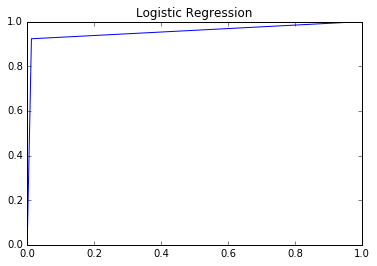

Logistic AUC Score:  0.955209347614


In [84]:
fpr, tpr, thresholds=roc_curve(y_test, logistics.predict(x_test))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Logistic Regression')
plt.show()

print 'Logistic AUC Score: ', roc_auc_score(y_test, logistics.predict(x_test))

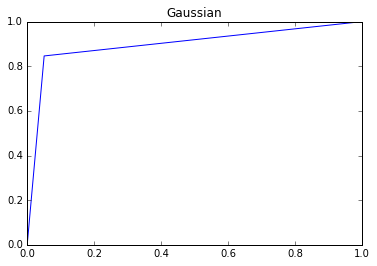

Gaussian AUC Score:  0.897760467381


In [86]:
fpr, tpr, thresholds=roc_curve(y_test, gaussian.predict(x_test))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Gaussian')
plt.show()

print 'Gaussian AUC Score: ', roc_auc_score(y_test, gaussian.predict(x_test))

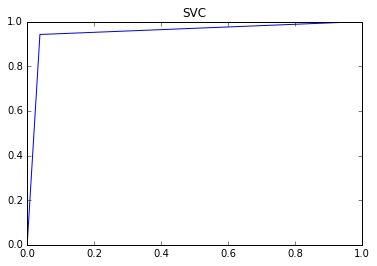

SVC AUC Score:  0.952166504382


In [88]:
fpr, tpr, thresholds=roc_curve(y_test, svc.predict(x_test))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('SVC')
plt.show()

print 'SVC AUC Score: ', roc_auc_score(y_test, svc.predict(x_test))

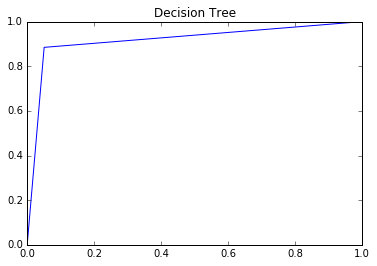

Decision Tree AUC Score:  0.916991236611


In [89]:
fpr, tpr, thresholds=roc_curve(y_test, decision_tree.predict(x_test))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Decision Tree')
plt.show()

print 'Decision Tree AUC Score: ', roc_auc_score(y_test, decision_tree.predict(x_test))

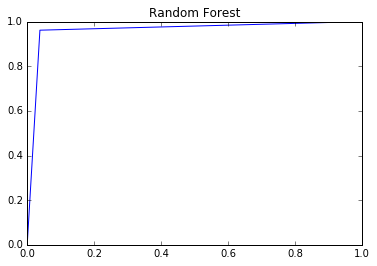

Random Forest AUC Score:  0.961781888997


In [91]:
fpr, tpr, thresholds=roc_curve(y_test, random_forest.predict(x_test))

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Random Forest')
plt.show()

print 'Random Forest AUC Score: ', roc_auc_score(y_test, random_forest.predict(x_test))

## Q3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [92]:
from sklearn.cross_validation import cross_val_score

In [106]:
print 'Logistic Regression CV Precision: ', np.mean(cross_val_score(logistics, X, y, scoring='precision'))
print 'Logistic Regression CV Recall: ', np.mean(cross_val_score(logistics, X, y, scoring='recall'))
print 'Logistic Regression CV Fscore: ', np.mean(cross_val_score(logistics, X, y, scoring='f1'))

Logistic Regression CV Precision:  0.948761196874
Logistic Regression CV Recall:  0.952164502165
Logistic Regression CV Fscore:  0.949613514592


In [108]:
print 'Gaussian CV Precision: ', np.mean(cross_val_score(gaussian, X, y, scoring='precision'))
print 'Gaussian CV Recall: ', np.mean(cross_val_score(gaussian, X, y, scoring='recall'))
print 'Gaussian CV Fscore: ', np.mean(cross_val_score(gaussian, X, y, scoring='f1'))

 Gaussian Regression CV Precision:  0.907820016128
Gaussian Regression CV Recall:  0.916341991342
Gaussian Regression CV Fscore:  0.910600361055


In [109]:
print 'SVC CV Precision: ', np.mean(cross_val_score(svc, X, y, scoring='precision'))
print 'SVC CV Recall: ', np.mean(cross_val_score(svc, X, y, scoring='recall'))
print 'SVC CV Fscore: ', np.mean(cross_val_score(svc, X, y, scoring='f1'))

SVC CV Precision:  0.921588244806
SVC CV Recall:  0.964177489177
SVC CV Fscore:  0.941752568965


In [110]:
print 'Decision Tree CV Precision: ', np.mean(cross_val_score(decision_tree, X, y, scoring='precision'))
print 'Decision Tree CV Recall: ', np.mean(cross_val_score(decision_tree, X, y, scoring='recall'))
print 'Decision Tree CV Fscore: ', np.mean(cross_val_score(decision_tree, X, y, scoring='f1'))

Decision Tree CV Precision:  0.919400315251
Decision Tree CV Recall:  0.958116883117
Decision Tree CV Fscore:  0.934872498287


In [111]:
print 'Random Forest CV Precision: ', np.mean(cross_val_score(random_forest, X, y, scoring='precision'))
print 'Random Forest CV Recall: ', np.mean(cross_val_score(random_forest, X, y, scoring='recall'))
print 'Random Forest CV Fscore: ', np.mean(cross_val_score(random_forest, X, y, scoring='f1'))

Random Forest CV Precision:  0.946243814665
Random Forest CV Recall:  0.958008658009
Random Forest CV Fscore:  0.944556130647
